In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

df = pd.read_excel('/Users/Trymso/Desktop/Data _Prosjekt_S/1. Liga Polen - 2024 25.xlsx')
df.head()

,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,...,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %",Recoveries per 90,Opponent half recoveries per 90,Own half losses per 90,Loose ball duels per 90
0,Z. Petrović,Kotwica Kołobrzeg,Kotwica Kołobrzeg,"DMF, LDMF, LCMF",23.0,100000,2025-06-30,16,1524,2,...,0.06,0.06,0.0,0.00,0,0,9.71,4.17,3.53,2.96
1,Y. Tkachuk,Warta Poznań,Warta Poznań,"RCMF, LCMF",29.0,150000,2025-06-30,17,1458,0,...,0.93,0.19,0.0,1.17,0,0,9.29,3.76,3.85,2.43
2,Xabi Auzmendi,Polonia Warszawa,Polonia Warszawa,"RCMF, LCMF",27.0,300000,2025-06-30,16,781,0,...,0.23,0.00,0.0,0.46,0,0,4.77,2.08,2.86,2.39
3,W. Żytek,Tychy 71,Tychy 71,"DMF, RCMF, LCMF",30.0,250000,2025-06-30,16,905,1,...,0.00,0.00,0.0,0.00,1,0,7.70,2.74,3.09,2.11
4,W. Zieliński,Arka Gdynia,Arka Gdynia,"RCMF, LDMF, RDMF",20.0,0,2027-06-30,7,195,0,...,0.00,0.00,0.0,0.00,0,0,7.02,3.37,3.37,2.41


# Keeper

In [15]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=185, min_minutes=700, max_age=30, position='GK'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ['Prevented goals per 90', "Save rate, %", "Passes to final third per 90",
                    "Accurate long passes, %", 'Exits per 90', 'Shots against per 90', 'xG against',
                    "xG against per 90"]

weights = [5, 4, 4, 3, 3, 2, 2, 1]

df_position = filter_position(df, original_metrics, weights)

df_keeper = df_position[["Player", "Age", "Team", "Market value", "Minutes played", 'Contract expires', "Z-Score", "Normalized Score (0-100)", 'Prevented goals per 90', "Save rate, %", "Passes to final third per 90",
                    "Accurate long passes, %", 'Exits per 90', 'Shots against per 90', 'xG against',
                    "xG against per 90"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)

df_keeper.head()

#top_3_players = df_sorted.head(3)

# Save the top 3 players to an Excel file
#top_3_players.to_excel("top_3_players.xlsx", index=False)


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_87920/1010317620.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_87920/1010317620.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_87920/1010317620.py:40: SettingWithCopyWa

,Player,Age,Team,Market value,Minutes played,Contract expires,Z-Score,Normalized Score (0-100),Prevented goals per 90,"Save rate, %",Passes to final third per 90,"Accurate long passes, %",Exits per 90,Shots against per 90,xG against,xG against per 90
144,M. Kuchta,28.0,Polonia Warszawa,150000,1550,2025-06-30,1.500619,93.33,0.127,76.92,1.39,77.78,2.09,3.77,17.18,1.00
406,A. Wilk,27.0,Stal Stalowa Wola,25000,1455,2025-06-30,1.166179,87.82,-0.043,73.00,2.47,69.61,2.04,6.19,26.30,1.63
439,A. Bobek,20.0,Łódzki KS,1000000,1148,2025-06-30,1.005820,84.27,0.261,80.88,1.72,65.15,1.72,5.33,16.33,1.28
255,J. Wrąbel,28.0,Miedź Legnica,200000,1853,2026-06-30,0.616487,73.12,0.201,77.78,0.68,62.63,1.89,3.93,22.13,1.07
244,K. Bąkowski,21.0,Stal Rzeszów,250000,1646,2026-06-30,0.613437,73.02,-0.005,71.43,0.93,71.57,1.31,4.21,21.90,1.20


# Høyre Back

In [360]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=0, min_minutes=700, max_age=30, position='RB'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ['Progressive runs per 90', "Accurate crosses, %", 'Forward passes per 90', 'Defensive duels won, %',
               "Accelerations per 90", 'Dribbles per 90', "Successful defensive actions per 90",
               "Accurate short / medium passes, %"]

weights = [5, 1, 5, 2, 3, 3, 2, 1]

df_position = filter_position(df, original_metrics, weights)

df_hoyre_back = df_position[["Player", "Age", "Team", "Minutes played", 'Contract expires', "Z-Score", "Normalized Score (0-100)", 'Progressive runs per 90', "Accurate crosses, %", 'Forward passes per 90', 'Defensive duels won, %',
               "Accelerations per 90", 'Dribbles per 90', "Successful defensive actions per 90",
               "Accurate short / medium passes, %"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_hoyre_back.head(3)


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/3706177811.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/3706177811.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/3706177811.py:40: SettingWithCopyWa

,Player,Age,Team,Minutes played,Contract expires,Z-Score,Normalized Score (0-100),Progressive runs per 90,"Accurate crosses, %",Forward passes per 90,"Defensive duels won, %",Accelerations per 90,Dribbles per 90,Successful defensive actions per 90,"Accurate short / medium passes, %"
49,R. Mikulec,27.0,Wisła Kraków,1698,2026-06-30,1.429029,92.35,3.23,32.61,17.49,68.09,0.53,4.40,8.16,88.82
392,B. Jaroch,29.0,Wisła Kraków,1716,2025-06-30,1.338929,90.97,2.20,36.25,20.87,61.54,0.10,2.05,8.44,91.51
290,J. Bednarczyk,25.0,Górnik Łęczna,1586,2025-06-30,1.283581,90.04,2.33,40.00,16.06,69.87,0.51,2.38,11.92,83.60


In [17]:
#exploring columns
columns_list = df.columns.tolist()
print(columns_list)

['Player', 'Team', 'Team within selected timeframe', 'Position', 'Age', 'Market value', 'Contract expires', 'Matches played', 'Minutes played', 'Goals', 'xG', 'Assists', 'xA', 'Duels per 90', 'Duels won, %', 'Birth country', 'Passport country', 'Foot', 'Height', 'Weight', 'On loan', 'Successful defensive actions per 90', 'Defensive duels per 90', 'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %', 'Sliding tackles per 90', 'PAdj Sliding tackles', 'Shots blocked per 90', 'Interceptions per 90', 'PAdj Interceptions', 'Fouls per 90', 'Yellow cards', 'Red cards', 'Successful attacking actions per 90', 'Non-penalty goals', 'Non-penalty goals per 90', 'xG per 90', 'Head goals', 'Head goals per 90', 'Shots per 90', 'Shots on target, %', 'Goal conversion, %', 'Assists per 90', 'Crosses per 90', 'Accurate crosses, %', 'Crosses from left flank per 90', 'Accurate crosses from left flank, %', 'Crosses from right flank per 90', 'Accurate crosses from right flank, %', 'Crosses to

# Høyre Stopper

In [362]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=188, min_minutes=700, max_age=30, position='RCB'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ['Defensive duels won, %', "Aerial duels won, %", "Successful defensive actions per 90", 
                    'Progressive passes per 90', "Long passes per 90", 'Shots blocked per 90', 
                    "Interceptions per 90", "Accurate short / medium passes, %"]

weights = [4, 5, 4, 3, 2, 3, 2, 1]


df_position = filter_position(df, original_metrics, weights)

df_hoyre_stopper = df_position[["Player", "Position", "Age", "Team", "Minutes played", 'Contract expires', "Z-Score", "Normalized Score (0-100)", 'Defensive duels won, %', "Aerial duels won, %", "Successful defensive actions per 90", 
                    'Progressive passes per 90', "Long passes per 90", 'Shots blocked per 90', 
                    "Interceptions per 90", "Accurate short / medium passes, %"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_hoyre_stopper.head()


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/3503934002.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/3503934002.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/3503934002.py:40: SettingWithCopyWa

,Player,Position,Age,Team,Minutes played,Contract expires,Z-Score,Normalized Score (0-100),"Defensive duels won, %","Aerial duels won, %",Successful defensive actions per 90,Progressive passes per 90,Long passes per 90,Shots blocked per 90,Interceptions per 90,"Accurate short / medium passes, %"
404,A. Zarówny,RCB,20.0,Chrobry Głogów,1193,NaN,1.341019,91.00,66.67,66.07,8.75,5.05,4.90,0.60,5.58,90.97
407,A. Uryga,RCB,30.0,Wisła Kraków,1604,2026-06-30,1.001358,84.17,66.67,63.08,8.64,6.28,3.37,1.01,5.05,94.35
422,A. Lukić,RCB,30.0,Ruch Chorzów,1422,2026-06-30,0.942880,82.71,63.86,63.39,8.67,7.34,6.08,0.70,5.13,94.16
257,J. Szymański,"CB, RCB",22.0,Wisła Płock,794,2025-06-30,0.896521,81.50,75.00,55.00,9.18,6.23,5.10,0.68,4.53,94.53
322,F. Kendzia,"CB, RCB",27.0,Znicz Pruszków,1055,2025-06-30,0.873796,80.89,76.32,57.14,7.17,5.12,4.27,0.77,4.69,90.24


# Venstre Stopper

In [364]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=185, min_minutes=700, max_age=30, position='LCB'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ['Defensive duels won, %', "Aerial duels won, %", "Progressive runs per 90", 
                    'Progressive passes per 90', 'Accelerations per 90', "Interceptions per 90", 'Shots blocked per 90', 
                     "Accurate short / medium passes, %"]

weights = [5, 4, 5, 3, 3, 3, 2, 1]


df_position = filter_position(df, original_metrics, weights)

df_venstre_stopper = df_position[["Player", "Position", "Foot", "Age", "Team", "Minutes played", 'Contract expires', "Z-Score", "Normalized Score (0-100)", 'Defensive duels won, %', "Aerial duels won, %", "Progressive runs per 90", 
                    'Passes per 90', 'Accelerations per 90', "Interceptions per 90", 'Shots blocked per 90', 
                     "Accurate short / medium passes, %"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_venstre_stopper.head(5)


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/3661704139.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/3661704139.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/3661704139.py:40: SettingWithCopyWa

,Player,Position,Foot,Age,Team,Minutes played,Contract expires,Z-Score,Normalized Score (0-100),"Defensive duels won, %","Aerial duels won, %",Progressive runs per 90,Passes per 90,Accelerations per 90,Interceptions per 90,Shots blocked per 90,"Accurate short / medium passes, %"
29,S. Szymański,"CB, LCB, RCB",right,28.0,Ruch Chorzów,1843,2026-06-30,1.801660,96.42,76.58,59.49,1.17,51.96,0.05,4.35,0.78,93.99
141,M. Kutwa,"LCB, RDMF",right,20.0,Wisła Kraków,908,2027-06-30,1.711697,95.65,80.49,56.41,0.69,43.41,0.10,4.46,0.89,87.47
176,M. Broda,LCB,NaN,24.0,Górnik Łęczna,1129,2025-06-30,1.653971,95.09,71.93,61.04,1.20,50.62,0.08,5.42,0.80,91.14
187,Ł. Wiech,"LCB, CB",right,27.0,Łódzki KS,1755,2026-06-30,1.017486,84.55,73.26,58.77,0.51,36.56,0.00,5.23,0.82,91.40
433,A. Edmundsson,"CB, LCB",right,24.0,Wisła Płock,1352,2026-06-30,0.820068,79.39,73.96,51.16,1.20,43.60,0.00,7.19,1.00,90.91


# Venstre Back

In [366]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=0, min_minutes=700, max_age=30, position='LB'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age) &
        (df['Foot'] == 'left')
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ["Progressive runs per 90", "Dribbles per 90", "Crosses per 90", 
                    "Accurate crosses from left flank, %", "Accelerations per 90", 
                    "Crosses to goalie box per 90", "Interceptions per 90", 
                    "Defensive duels won, %"]

weights = [5, 4, 4, 2, 3, 2, 2, 3] 



df_position = filter_position(df, original_metrics, weights)

df_venstre_back = df_position[["Player", "Position", "Age", "Team", "Minutes played", "Z-Score", "Normalized Score (0-100)", "Progressive runs per 90", "Dribbles per 90", "Crosses per 90", 
                    "Accurate crosses from left flank, %", "Accelerations per 90", 
                    "Crosses to goalie box per 90", "Interceptions per 90", 
                    "Defensive duels won, %"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_venstre_back.head()


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/140443860.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/140443860.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/140443860.py:41: SettingWithCopyWarni

,Player,Position,Age,Team,Minutes played,Z-Score,Normalized Score (0-100),Progressive runs per 90,Dribbles per 90,Crosses per 90,"Accurate crosses from left flank, %",Accelerations per 90,Crosses to goalie box per 90,Interceptions per 90,"Defensive duels won, %"
364,D. Gojny,LB,30.0,Arka Gdynia,1839,1.063766,85.63,0.88,1.76,2.94,43.86,0.20,0.29,4.75,66.06
205,K. Wachowiak,"LB, LWF, LAMF",23.0,Stal Rzeszów,891,1.020782,84.63,1.92,3.84,4.24,28.21,0.10,1.41,3.94,69.66
171,M. Dijaković,"LCB, LB",22.0,Tychy 71,1130,0.999879,84.13,2.15,0.40,1.51,43.75,0.24,0.08,6.45,65.98
20,T. Milašius,"LWB, LB",23.0,Pogoń Siedlce,826,0.854736,80.37,0.87,1.85,3.38,50.00,0.11,0.54,4.47,59.02
371,D. Barauskas,"LB, LCB",27.0,Górnik Łęczna,1157,0.841193,79.99,0.47,0.23,1.01,38.46,0.00,0.08,4.82,72.73


# 6er A

In [368]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=0, min_minutes=700, max_age=30, position='DMF'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ["Interceptions per 90", "Defensive duels won, %", "Successful defensive actions per 90", 
                    "Opponent half recoveries per 90", "Loose ball duels per 90", 
                    "Accelerations per 90", "Accurate short / medium passes, %", 
                    "PAdj Interceptions"]

weights = [5, 4, 3, 2, 2, 2, 1, 1] 



df_position = filter_position(df, original_metrics, weights)

df_6er_A = df_position[["Player", "Position", "Age", "Team", "Minutes played", "Z-Score", "Normalized Score (0-100)", "Interceptions per 90", "Defensive duels won, %", "Successful defensive actions per 90", 
                    "Opponent half recoveries per 90", "Loose ball duels per 90", 
                    "Accelerations per 90", "Accurate short / medium passes, %", 
                    "PAdj Interceptions"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_6er_A.head()


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/1483575550.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/1483575550.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/1483575550.py:40: SettingWithCopyWa

,Player,Position,Age,Team,Minutes played,Z-Score,Normalized Score (0-100),Interceptions per 90,"Defensive duels won, %",Successful defensive actions per 90,Opponent half recoveries per 90,Loose ball duels per 90,Accelerations per 90,"Accurate short / medium passes, %",PAdj Interceptions
68,P. Plewka,DMF,25.0,Znicz Pruszków,1230,2.293412,98.91,6.59,77.55,9.37,3.39,1.22,0.15,90.07,7.83
141,M. Kutwa,"LCB, RDMF",20.0,Wisła Kraków,908,2.119676,98.30,4.46,80.49,7.83,3.08,1.82,0.10,87.47,7.54
230,K. Imai,"RCMF, DMF, LCMF",25.0,Znicz Pruszków,830,1.615786,94.69,4.23,75.81,9.65,3.80,1.82,0.11,85.47,5.32
3,W. Żytek,"DMF, RCMF, LCMF",30.0,Tychy 71,905,0.729209,76.71,5.27,67.65,8.15,2.74,2.11,0.00,86.29,7.99
281,J. Igbekeme,"RDMF, RCMF, LDMF",29.0,Wisła Kraków U17,1011,0.728328,76.68,3.38,67.95,8.10,4.35,2.99,0.36,89.87,7.08


# 6er B

In [370]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=0, min_minutes=700, max_age=30, position='DMF'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ["Forward passes per 90", "Accurate passes to final third, %", "Passes per 90", 
                    "Progressive passes per 90", "Key passes per 90", 
                    "Smart passes per 90", 'Through passes per 90', "Accurate short / medium passes, %"]

weights = [5, 4, 3, 3, 2, 1, 1, 1] 



df_position = filter_position(df, original_metrics, weights)

df_6er_B = df_position[["Player", "Position", "Age", "Team", "Minutes played", "Z-Score", "Normalized Score (0-100)", "Forward passes per 90", "Accurate passes to final third, %", "Passes per 90", 
                    "Progressive passes per 90", "Key passes per 90", 
                    "Smart passes per 90", 'Through passes per 90', "Accurate short / medium passes, %"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_6er_B.head()


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/38215721.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/38215721.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/38215721.py:40: SettingWithCopyWarning:

,Player,Position,Age,Team,Minutes played,Z-Score,Normalized Score (0-100),Forward passes per 90,"Accurate passes to final third, %",Passes per 90,Progressive passes per 90,Key passes per 90,Smart passes per 90,Through passes per 90,"Accurate short / medium passes, %"
218,K. Lysiak,"DMF, RDMF",20.0,Stal Rzeszów,1622,1.805081,96.45,15.70,88.27,48.55,9.77,0.06,0.11,0.39,90.69
373,Chuca,"RCMF, LDMF, AMF",27.0,Miedź Legnica,751,1.634253,94.89,16.06,82.93,52.01,9.23,0.24,0.12,0.84,89.74
28,S. Thill,"LCMF, LDMF",30.0,Stal Rzeszów,1810,1.594711,94.46,22.92,67.03,56.93,13.03,0.35,0.25,1.74,89.10
281,J. Igbekeme,"RDMF, RCMF, LDMF",29.0,Wisła Kraków U17,1011,1.362930,91.35,15.85,83.00,47.00,8.55,0.45,0.18,0.71,89.87
105,Marc Carbó,"LDMF, RDMF, LCMF",30.0,Wisła Kraków,1282,1.246336,89.37,17.97,76.87,49.42,9.13,0.07,0.07,0.98,87.93


# 8er A

In [372]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=0, min_minutes=700, max_age=30, position='CMF'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ["Key passes per 90", "Shots per 90", "Shot assists per 90", 
                    "Progressive runs per 90", "Offensive duels per 90", 
                    "Touches in box per 90", 'Passes to penalty area per 90',
                    "Deep completions per 90"]

weights = [5, 4, 4, 3, 3, 2, 2, 1] 



df_position = filter_position(df, original_metrics, weights)

df_8er_A = df_position[["Player", "Position", "Age", "Team", "Minutes played", "Z-Score", "Normalized Score (0-100)", 'Goals', 'Assists', "Key passes per 90", "Shots per 90", "Shot assists per 90", 
                    "Progressive runs per 90", "Offensive duels per 90", 
                    "Touches in box per 90", 'Passes to penalty area per 90',
                    "Deep completions per 90"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_8er_A.head()


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/3156787154.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/3156787154.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/3156787154.py:40: SettingWithCopyWa

,Player,Position,Age,Team,Minutes played,Z-Score,Normalized Score (0-100),Goals,Assists,Key passes per 90,Shots per 90,Shot assists per 90,Progressive runs per 90,Offensive duels per 90,Touches in box per 90,Passes to penalty area per 90,Deep completions per 90
246,Jorge Jiménez,RCMF,25.0,Wisła Płock,1566,2.434719,99.25,7,2,0.52,2.30,1.49,2.99,9.66,3.10,4.83,1.61
227,K. Karasek,"CF, LCMF",22.0,Nieciecza,1098,2.224986,98.70,10,3,0.33,4.18,1.48,1.31,9.34,3.36,3.11,1.15
295,I. Strzałek,"LCMF, DMF, AMF",20.0,Nieciecza,998,2.222778,98.69,2,5,0.90,2.43,1.62,1.62,9.11,4.51,3.43,1.53
181,M. Bajdur,"AMF, LCMF, LWF",30.0,Polonia Warszawa,760,1.675265,95.31,1,1,0.95,2.13,1.89,2.01,7.70,2.13,3.67,1.30
306,H. Vitalucci,"AMF, LCMF",22.0,Arka Gdynia,970,1.669378,95.25,4,0,0.46,3.62,1.11,2.13,7.89,2.69,2.69,0.74


# 8er B

In [374]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=0, min_minutes=700, max_age=30, position='CMF'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ["Opponent half recoveries per 90", "Defensive duels won, %", 
                    "Key passes per 90", "Offensive duels won, %", 'Progressive runs per 90', 
                    "Accelerations per 90", 'Touches in box per 90',
                    "Accurate short / medium passes, %"]

weights = [5, 4, 3, 3, 3, 3, 2, 1] 



df_position = filter_position(df, original_metrics, weights)

df_8er_B = df_position[["Player", "Position", "Age", "Team", "Minutes played", "Z-Score", "Normalized Score (0-100)", 'Goals', 'Assists', "Opponent half recoveries per 90", "Defensive duels won, %", 
                    "Key passes per 90", "Offensive duels won, %", 'Progressive runs per 90', 
                    "Accelerations per 90", 'Touches in box per 90',
                    "Accurate short / medium passes, %"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_8er_B.head()


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/2039823135.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/2039823135.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/2039823135.py:40: SettingWithCopyWa

,Player,Position,Age,Team,Minutes played,Z-Score,Normalized Score (0-100),Goals,Assists,Opponent half recoveries per 90,"Defensive duels won, %",Key passes per 90,"Offensive duels won, %",Progressive runs per 90,Accelerations per 90,Touches in box per 90,"Accurate short / medium passes, %"
246,Jorge Jiménez,RCMF,25.0,Wisła Płock,1566,1.770171,96.17,7,2,4.26,67.83,0.52,51.79,2.99,0.46,3.10,86.60
105,Marc Carbó,"LDMF, RDMF, LCMF",30.0,Wisła Kraków,1282,1.660888,95.16,0,1,5.62,60.33,0.07,61.45,0.98,0.07,1.40,87.93
230,K. Imai,"RCMF, DMF, LCMF",25.0,Znicz Pruszków,830,1.628374,94.83,0,1,3.80,75.81,0.43,44.00,1.41,0.11,0.43,85.47
281,J. Igbekeme,"RDMF, RCMF, LDMF",29.0,Wisła Kraków U17,1011,1.344556,91.06,0,1,4.35,67.95,0.45,47.37,1.07,0.36,1.34,89.87
289,J. Bieroński,"LCMF, RCMF",21.0,Tychy 71,784,1.301656,90.35,0,2,2.78,58.21,0.34,65.22,0.92,0.00,1.38,83.01


# 10er

In [376]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=0, min_minutes=700, max_age=30, position='AMF'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ["Key passes per 90", "Shot assists per 90", 
                    "Dribbles per 90", "xA per 90", 'Shots per 90', 
                    "Smart passes per 90", 'Deep completions per 90',
                    "Touches in box per 90"]

weights = [5, 4, 3, 3, 3, 3, 2, 2] 



df_position = filter_position(df, original_metrics, weights)

df_10er = df_position[["Player", "Position", "Age", "Team", "Minutes played", "Z-Score", "Normalized Score (0-100)", 'Goals', 'Assists', "Key passes per 90", "Shot assists per 90", 
                    "Dribbles per 90", "xA per 90", 'Shots per 90', 
                    "Smart passes per 90", 'Deep completions per 90',
                    "Touches in box per 90"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_10er.head()


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/788485800.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/788485800.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/788485800.py:40: SettingWithCopyWarni

,Player,Position,Age,Team,Minutes played,Z-Score,Normalized Score (0-100),Goals,Assists,Key passes per 90,Shot assists per 90,Dribbles per 90,xA per 90,Shots per 90,Smart passes per 90,Deep completions per 90,Touches in box per 90
146,M. Kozak,"AMF, RWF, RAMF",27.0,Ruch Chorzów,947,2.254970,98.79,2,3,0.86,2.47,8.93,0.26,2.00,0.19,1.52,2.76
402,Angel Baena,"RAMF, RW",24.0,Wisła Kraków,1012,2.188693,98.57,1,4,1.16,1.60,9.07,0.22,1.42,0.00,0.98,4.89
245,K. Antonik,"LW, LAMF",26.0,Miedź Legnica,1233,1.861399,96.87,4,3,0.51,1.24,8.03,0.10,2.85,0.22,1.39,4.09
25,T. Gaprindashvili,"RW, RAMF, RWF",27.0,Arka Gdynia,1497,1.451463,92.67,1,6,0.84,1.26,6.73,0.25,1.92,0.42,1.74,3.19
268,J. Oliveira,"LW, LAMF, LWF",28.0,Arka Gdynia,1473,1.387641,91.74,4,2,0.86,1.34,5.62,0.13,2.63,0.12,1.47,4.09


# Høyre Ving

In [378]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=0, min_minutes=700, max_age=30, position='RW'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age) &
        (df['Foot'] == 'left')
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ["Dribbles per 90", "Touches in box per 90", 
                    "Successful dribbles, %", "Accelerations per 90", "xA", 'Assists', 
                    "Progressive runs per 90", 'Smart passes per 90']

weights = [5, 4, 5, 3, 3, 3, 2, 2] 



df_position = filter_position(df, original_metrics, weights)

df_hoyre_ving = df_position[["Player", "Position", "Foot", "Age", "Team", "Minutes played", "Z-Score", "Normalized Score (0-100)", "Dribbles per 90", "Touches in box per 90", 
                    "Successful dribbles, %", "Accelerations per 90", 'xG', 'Goals', "xA", 'Assists', 
                    "Progressive runs per 90", 'Smart passes per 90']].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_hoyre_ving.head()


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/935720353.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/935720353.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/935720353.py:41: SettingWithCopyWarni

,Player,Position,Foot,Age,Team,Minutes played,Z-Score,Normalized Score (0-100),Dribbles per 90,Touches in box per 90,"Successful dribbles, %",Accelerations per 90,xG,Goals,xA,Assists,Progressive runs per 90,Smart passes per 90
25,T. Gaprindashvili,"RW, RAMF, RWF",left,27.0,Arka Gdynia,1497,1.412666,92.11,6.73,3.19,56.25,0.48,4.48,1,4.14,6,2.77,0.42
362,D. Hilbrycht,"RWB, LWB, RB",left,26.0,Nieciecza,868,-0.000137,49.99,1.97,2.18,57.89,0.21,0.67,1,3.04,6,1.87,0.31
146,M. Kozak,"AMF, RWF, RAMF",left,27.0,Ruch Chorzów,947,-0.648152,25.84,8.93,2.76,48.94,0.38,1.35,2,2.76,3,4.56,0.19
58,P. Zaucha,"LWB, LB, RWB",left,24.0,Stal Stalowa Wola,1671,-0.764378,22.23,3.39,2.59,57.14,0.22,2.25,0,1.06,1,3.12,0.05


# Venstre Ving

In [380]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=0, min_minutes=700, max_age=30, position='LW'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age) &
        (df['Foot'] == 'right')
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ["Accelerations per 90", "Progressive runs per 90", 
                    "Dribbles per 90", "Successful dribbles, %", "xG per 90", 'xA per 90', 
                    "Non-penalty goals per 90", 'Touches in box per 90']

weights = [5, 5, 5, 3, 3, 3, 2, 2] 



df_position = filter_position(df, original_metrics, weights)

df_venstre_ving = df_position[["Player", "Position", "Foot", "Age", "Team", "Minutes played", "Z-Score", "Normalized Score (0-100)", "Accelerations per 90", "Progressive runs per 90", 
                    "Dribbles per 90", "Successful dribbles, %", 'Goals', 'Assists', "xG per 90", 'xA per 90', 
                    "Non-penalty goals per 90", 'Touches in box per 90']].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_venstre_ving.head()


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/115807801.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/115807801.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/115807801.py:41: SettingWithCopyWarni

,Player,Position,Foot,Age,Team,Minutes played,Z-Score,Normalized Score (0-100),Accelerations per 90,Progressive runs per 90,Dribbles per 90,"Successful dribbles, %",Goals,Assists,xG per 90,xA per 90,Non-penalty goals per 90,Touches in box per 90
268,J. Oliveira,"LW, LAMF, LWF",right,28.0,Arka Gdynia,1473,1.476321,93.01,1.10,3.67,5.62,58.70,4,2,0.30,0.13,0.24,4.09
194,L. Kreković,"RWF, RAMF, LWF",right,24.0,Kotwica Kołobrzeg,722,1.071417,85.80,0.62,3.12,5.36,58.14,0,1,0.13,0.05,0.00,2.12
245,K. Antonik,"LW, LAMF",right,26.0,Miedź Legnica,1233,0.834867,79.81,0.22,3.72,8.03,49.09,4,3,0.25,0.10,0.29,4.09
24,T. Kiss,"LAMF, RAMF, LW",right,24.0,Wisła Kraków,901,0.728618,76.69,0.40,2.50,3.30,57.58,2,2,0.31,0.39,0.20,3.60
328,E. Terpiłowski,"RB, LW, RWF",right,23.0,Polonia Warszawa,1280,0.700000,75.80,0.35,1.69,0.98,64.29,1,2,0.11,0.18,0.07,1.76


# Spiss A

In [382]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=180, min_minutes=700, max_age=30, position='CF'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ["Non-penalty goals per 90", 'xG per 90', "Touches in box per 90", 
                    "Shots per 90", "Received passes per 90", "Progressive runs per 90",
                    'Accelerations per 90', "Goal conversion, %"]

weights = [4, 5, 4, 3, 3, 3, 2, 2] 



df_position = filter_position(df, original_metrics, weights)

df_spiss_A = df_position[["Player", "Position", "Foot", "Age", "Team", "Minutes played", "Z-Score", "Normalized Score (0-100)", 'Non-penalty goals per 90', 'xG per 90', "Touches in box per 90", 
                    "Shots per 90", "Received passes per 90", "Progressive runs per 90",
                    'Accelerations per 90', "Goal conversion, %"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_spiss_A.head()


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/280522446.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/280522446.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/280522446.py:40: SettingWithCopyWarni

,Player,Position,Foot,Age,Team,Minutes played,Z-Score,Normalized Score (0-100),Non-penalty goals per 90,xG per 90,Touches in box per 90,Shots per 90,Received passes per 90,Progressive runs per 90,Accelerations per 90,"Goal conversion, %"
227,K. Karasek,"CF, LCMF",right,22.0,Nieciecza,1098,1.659503,95.15,0.66,0.58,3.36,4.18,17.62,1.31,0.49,19.608
340,D. Warchoł,"CF, AMF, LCMF",both,29.0,Górnik Łęczna,1384,1.570813,94.19,0.65,0.41,2.93,2.15,13.59,0.65,0.13,30.303
241,K. Czubak,CF,right,24.0,Arka Gdynia,1432,0.917299,82.05,0.82,0.74,5.91,3.83,7.29,0.31,0.06,22.951
347,D. Stanclik,CF,right,24.0,Znicz Pruszków,1245,0.836127,79.85,0.51,0.60,3.90,2.96,9.61,0.58,0.07,24.390
302,I. Kaczmarski,"LCMF, LDMF, CF",right,20.0,Miedź Legnica,1547,0.712722,76.20,0.17,0.05,0.81,1.11,20.54,1.45,0.52,15.789


# Spiss B

In [384]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=185, min_minutes=700, max_age=30, position='CF'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
original_metrics = ["Head goals", 'Non-penalty goals', "xG", 
                    "Shots per 90", "Accelerations per 90", "Received long passes per 90",
                    'Offensive duels won, %', "Goal conversion, %"]

weights = [5, 4, 4, 3, 3, 3, 2, 2] 



df_position = filter_position(df, original_metrics, weights)

df_spiss_B = df_position[["Player", "Position", "Foot", "Age", "Team", "Minutes played", "Z-Score", "Normalized Score (0-100)", "Head goals", 'Non-penalty goals', "xG", 
                    "Shots per 90", "Accelerations per 90", "Received long passes per 90",
                    'Offensive duels won, %', "Goal conversion, %"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)
df_spiss_B.head()


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/4096049333.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/4096049333.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/4096049333.py:40: SettingWithCopyWa

,Player,Position,Foot,Age,Team,Minutes played,Z-Score,Normalized Score (0-100),Head goals,Non-penalty goals,xG,Shots per 90,Accelerations per 90,Received long passes per 90,"Offensive duels won, %","Goal conversion, %"
241,K. Czubak,CF,right,24.0,Arka Gdynia,1432,1.816543,96.54,4,13,11.72,3.83,0.06,2.01,21.74,22.951
185,Ł. Zjawiński,CF,right,23.0,Polonia Warszawa,1331,1.509436,93.44,4,6,13.24,3.25,0.00,1.76,30.19,20.833
44,S. Feiertag,CF,right,23.0,Łódzki KS,1448,1.171067,87.92,3,8,7.30,2.36,0.00,0.99,36.27,21.053
347,D. Stanclik,CF,right,24.0,Znicz Pruszków,1245,0.991943,83.94,0,7,8.29,2.96,0.07,2.39,33.87,24.390
82,P. Banaszak,CF,right,27.0,Górnik Łęczna,1734,0.582243,71.98,3,7,6.98,2.60,0.05,2.28,28.16,18.000


# Save to Excel

In [387]:
df_keeper.head()
df_hoyre_back.head()
df_hoyre_stopper.head()
df_venstre_stopper.head()
df_venstre_back.head()
df_6er_A.head()
df_6er_B.head()
df_8er_A.head()
df_8er_B.head()
df_10er.head()
df_hoyre_ving.head()
df_venstre_ving.head()
df_spiss_A.head()
df_spiss_B.head()

,Player,Age,Team,Minutes played,Contract expires,Z-Score,Normalized Score (0-100),Prevented goals per 90,"Save rate, %",Passes to final third per 90,"Accurate long passes, %",Exits per 90,Shots against per 90,xG against,xG against per 90
144,M. Kuchta,28.0,Polonia Warszawa,1550,2025-06-30,1.500619,93.33,0.127,76.92,1.39,77.78,2.09,3.77,17.18,1.00
406,A. Wilk,27.0,Stal Stalowa Wola,1455,2025-06-30,1.166179,87.82,-0.043,73.00,2.47,69.61,2.04,6.19,26.30,1.63
439,A. Bobek,20.0,Łódzki KS,1148,2025-06-30,1.005820,84.27,0.261,80.88,1.72,65.15,1.72,5.33,16.33,1.28
255,J. Wrąbel,28.0,Miedź Legnica,1853,2026-06-30,0.616487,73.12,0.201,77.78,0.68,62.63,1.89,3.93,22.13,1.07
244,K. Bąkowski,21.0,Stal Rzeszów,1646,2026-06-30,0.613437,73.02,-0.005,71.43,0.93,71.57,1.31,4.21,21.90,1.20


In [393]:
import pandas as pd

# Opprett en dictionary med dataframes
dfs = {
    "Keeper": df_keeper.head(5),
    "Høyre Back": df_hoyre_back.head(5),
    "Høyre Stopper": df_hoyre_stopper.head(5),
    "Venstre Stopper": df_venstre_stopper.head(5),
    "Venstre Back": df_venstre_back.head(5),
    "6er A": df_6er_A.head(5),
    "6er B": df_6er_B.head(5),
    "8er A": df_8er_A.head(5),
    "8er B": df_8er_B.head(5),
    "10er": df_10er.head(5),
    "Høyre Ving": df_hoyre_ving.head(5),
    "Venstre Ving": df_venstre_ving.head(5),
    "Spiss A": df_spiss_A.head(5),
    "Spiss B": df_spiss_B.head(5)
}

# Lagre til Excel med hver posisjon på eget ark
excel_path = "Top5_Spillere_Per_Posisjon.xlsx"
with pd.ExcelWriter(excel_path, engine="xlsxwriter") as writer:
    for sheet_name, df in dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Excel-filen er lagret som {excel_path}")


Excel-filen er lagret som Top5_Spillere_Per_Posisjon.xlsx


# Radar Chart

In [436]:
df_keeper.head()

,Player,Age,Team,Minutes played,Contract expires,Z-Score,Normalized Score (0-100),Prevented goals per 90,"Save rate, %",Passes to final third per 90,...,xG against,xG against per 90,Prevented goals p90,Save rate %,Passes to 1/3 p90,Long passes %,Exits p90,Shots against p90,xGA,xGA p90
144,M. Kuchta,28.0,Polonia Warszawa,1550,2025-06-30,1.500619,93.33,0.127,76.92,1.39,...,17.18,1.00,66,83,40,100,93,40,46,36
406,A. Wilk,27.0,Stal Stalowa Wola,1455,2025-06-30,1.166179,87.82,-0.043,73.00,2.47,...,26.30,1.63,26,53,93,66,86,100,100,93
439,A. Bobek,20.0,Łódzki KS,1148,2025-06-30,1.005820,84.27,0.261,80.88,1.72,...,16.33,1.28,100,100,46,53,66,93,40,66
255,J. Wrąbel,28.0,Miedź Legnica,1853,2026-06-30,0.616487,73.12,0.201,77.78,0.68,...,22.13,1.07,86,93,20,33,73,46,86,46
244,K. Bąkowski,21.0,Stal Rzeszów,1646,2026-06-30,0.613437,73.02,-0.005,71.43,0.93,...,21.90,1.20,53,43,33,86,20,60,80,53


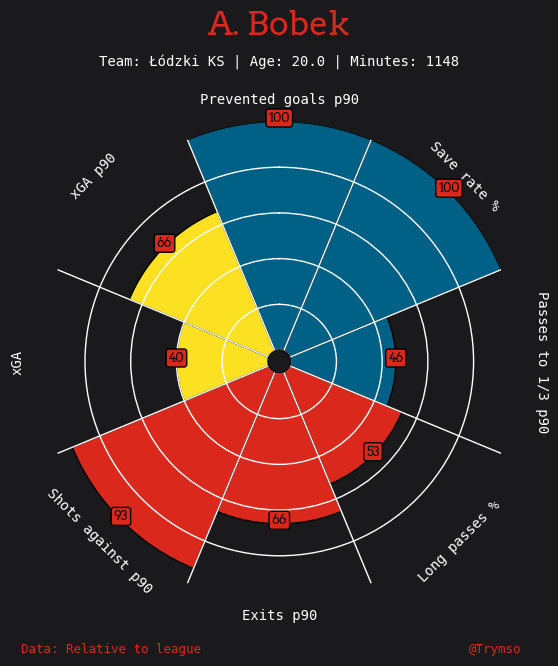

In [11]:
from mplsoccer import Radar
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.font_manager as font_manager

def plot_radar(df_keeper):

    font_path = 'Arvo-Regular.ttf'
    font_props = font_manager.FontProperties(fname=font_path)

    df_keeper['Prevented goals p90'] = (df_keeper['Prevented goals per 90'].rank(pct=True) * 100).astype(int)
    df_keeper['Save rate %'] = (df_keeper['Save rate, %'].rank(pct=True) * 100).astype(int)
    df_keeper['Passes to 1/3 p90'] = (df_keeper['Passes to final third per 90'].rank(pct=True) * 100).astype(int)
    df_keeper['Long passes %'] = (df_keeper['Accurate long passes, %'].rank(pct=True) * 100).astype(int)
    df_keeper['Exits p90'] = (df_keeper['Exits per 90'].rank(pct=True) * 100).astype(int)
    df_keeper['Shots against p90'] = (df_keeper['Shots against per 90'].rank(pct=True) * 100).astype(int)
    df_keeper['xGA'] = (df_keeper['xG against'].rank(pct=True) * 100).astype(int)
    df_keeper['xGA p90'] = (df_keeper['xG against per 90'].rank(pct=True) * 100).astype(int)


    #Filtering and sorting which columns to use in radar
    columns_to_plot = [
        'Prevented goals p90', 'Save rate %', 'Passes to 1/3 p90', 'Long passes %',
        'Exits p90', 'Shots against p90', 'xGA',
        'xGA p90'
    ]

    #Creating min and max value for radar
    radar = Radar(
        params=columns_to_plot,
        min_range=[0 for _ in columns_to_plot],
        max_range=[100 for _ in columns_to_plot]
    )

    slice_colors = ["#006086"] * 3 + ["#DA291C"] * 3 + ["#FBE122"] * 2



    #Players to plot
    #bobek = df_keeper[df_keeper['Player'] == 'A. Bobek']    
    player = df_keeper[df_keeper['Player'] == 'A. Bobek']



    # Setup the pizza plot
    pizza = PyPizza(
        params=columns_to_plot,
        background_color='#1A1A1D',
        straight_line_color='white',
        straight_line_lw=1,
        last_circle_lw=0,
        other_circle_color='white',
        other_circle_ls='-',
        other_circle_lw=1
    )

    # Create the figure and plot
    fig, ax = pizza.make_pizza(
        figsize=(8, 8),  # Increase the figure size
        slice_colors=slice_colors, 
        values=list(player[columns_to_plot].values.flatten()),
        kwargs_values=dict(
            color='#000000', fontsize=9, fontproperties=font_props, 
            bbox={
                'edgecolor': 'black',
                'facecolor': '#DA291C',    #A52A2A  #8B0000
                "boxstyle": 'round, pad= .2',
                "lw": 1
            }
        ),

        kwargs_slices=dict(
            facecolor="#FFFFFF",  # New color (example: red)
            edgecolor="black",  # White edge for the slices
            linewidth=1
        ),

        kwargs_params=dict(
            color='#FFFFFF',  # White color for the labels (change as needed)
            fontsize=10,  # Font size for the labels
            fontproperties='monospace' # Custom font
        )
    )

    # Adjust the margins to add space around the plot
    fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

    fig.text(
    0.5, 0.87,
    f"Team: {player['Team'].iloc[0]} | Age: {player['Age'].iloc[0]} | Minutes: {player['Minutes played'].iloc[0]}",
    size=10, color="white", ha="center", fontproperties='monospace'
)



    # Add the title
    ax.text(x=.5, y=1.20, s='A. Bobek', fontsize=24, weight='bold', c='#DA291C', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


    ax.text(
        x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
        s='Data: Relative to league',  # Example subtext
        fontsize=9,  # Smaller font size for subtext
        color='#DA291C',  # Subtext color (white in this example)
        ha='center', 
        va='center', 
        fontproperties='monospace', 
        transform=ax.transAxes
    )



    ax.text(
        x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
        s='@Trymso',  # Example subtext
        fontsize=9,  # Smaller font size for subtext
        color='#DA291C',  # Subtext color (white in this example)
        ha='center', 
        va='center', 
        fontproperties='monospace', 
        transform=ax.transAxes
    )


plot_radar(df_keeper)

In [ ]:
from mplsoccer import PyPizza
import matplotlib.pyplot as plt

def plot_radar(df_keeper, metrics, player_name='A. Bobek', height=0, min_minutes=700, max_age=30, position='GK', slice_colors=None):
    # Filter dataframe for relevant players
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ].copy()  # Use `.copy()` to avoid modifying the original dataframe

    metrics = ['Prevented goals per 90', "Save rate, %", "Passes to final third per 90",
               "Accurate long passes, %", 'Exits per 90', 'Shots against per 90', 'xG against',
               "xG against per 90"]

    # Compute percentiles **only within the filtered dataset**
    for metric in metrics:
        df_filtered[metric] = (df_filtered[metric].rank(pct=True) * 100).astype(int)

    # Get player's values (filtered dataset)
    player_data = df_filtered[df_filtered['Player'] == player_name][metrics]
    if player_data.empty:
        print(f"Spiller {player_name} ikke funnet i datasettet.")
        return

    values = player_data.values.flatten()

    # Default slice colors if none provided
    if slice_colors is None:
        slice_colors = ["#006086"] * 3 + ["#DA291C"] * 3 + ["#FBE122"] * 2  # Adjust colors as needed

    # Create radar plot
    pizza = PyPizza(
        params=metrics,
        background_color='#1A1A1D',
        straight_line_color='white',
        straight_line_lw=1,
        last_circle_lw=0,
        other_circle_color='white',
        other_circle_ls='-',
        other_circle_lw=1
    )

    # Plot radar
    fig, ax = pizza.make_pizza(
        values=values,
        figsize=(8, 8),
        slice_colors=slice_colors,
        kwargs_values=dict(
            color='#000000', fontsize=9, 
            bbox={'edgecolor': 'black', 'facecolor': '#DA291C', "boxstyle": 'round, pad= .2', "lw": 1}
        ),
        kwargs_slices=dict(facecolor="#FFFFFF", edgecolor="black", linewidth=1),
        kwargs_params=dict(color='#FFFFFF', fontsize=10)
    )

    # Adjust margins
    fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)

    # Add title
    ax.text(x=.5, y=1.23, s=player_name, fontsize=24, weight='bold', c='#DA291C', ha='center', transform=ax.transAxes)

    # Add credits
    ax.text(x=.15, y=-0.1, s='Data: FBref via Opta', fontsize=9, color='#DA291C', ha='center', transform=ax.transAxes)
    ax.text(x=.95, y=-0.1, s='@Trymso', fontsize=9, color='#DA291C', ha='center', transform=ax.transAxes)

    plt.show()

# Call function
plot_radar(df, metrics=['Prevented goals per 90', "Save rate, %", "Passes to final third per 90",
                        "Accurate long passes, %", 'Exits per 90', 'Shots against per 90', 'xG against',
                        "xG against per 90"], player_name='A. Bobek')


In [418]:
df_keeper.columns

Index(['Player', 'Age', 'Team', 'Minutes played', 'Contract expires',
       'Z-Score', 'Normalized Score (0-100)', 'Prevented goals per 90',
       'Save rate, %', 'Passes to final third per 90',
       'Accurate long passes, %', 'Exits per 90', 'Shots against per 90',
       'xG against', 'xG against per 90'],
      dtype='object')

# Scatter Plots 

# Playmakers

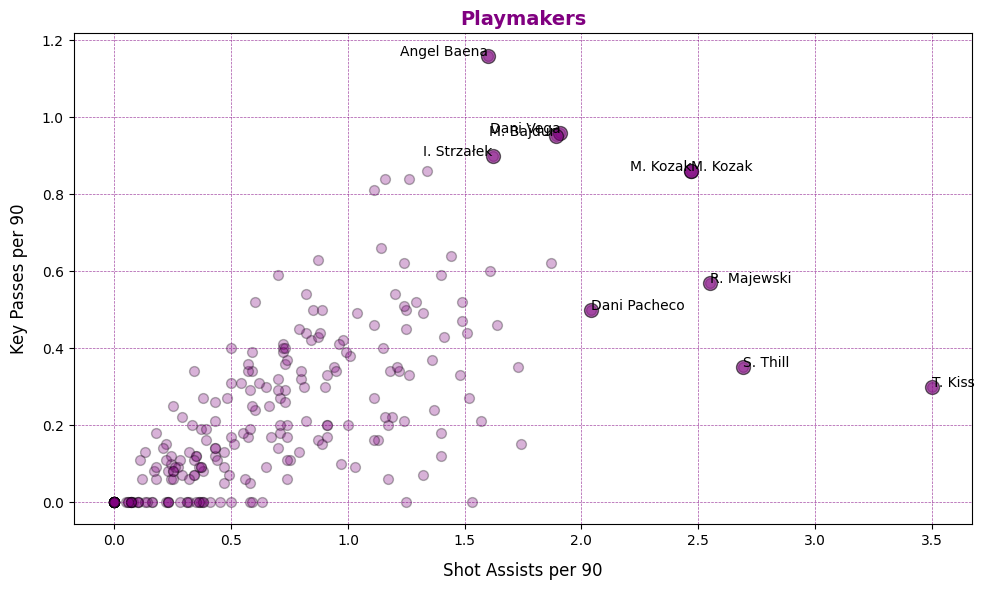

In [340]:
import matplotlib.pyplot as plt

def plot_playmakers(df):
    """
    Plots a scatter plot of Shot Assists per 90 vs. Key Passes per 90,
    highlighting the top 3 players in both categories.

    Parameters:
    df (DataFrame): DataFrame containing 'Shot Assists per 90', 'Key Passes per 90', 
                    'Minutes played', and 'Player' columns.
    """
    # Filter players with at least 700 minutes played
    df = df[df['Minutes played'] >= 700]

    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot for all players with alpha
    ax.scatter(df['Shot assists per 90'], df['Key passes per 90'], 
               color='purple', alpha=0.3, edgecolor='black', s=50, label="Players")

    # Highlight top 3 for Shot Assists
    top_shot_assists = df.nlargest(5, 'Shot assists per 90')
    ax.scatter(top_shot_assists['Shot assists per 90'], top_shot_assists['Key passes per 90'], 
               color='purple', alpha=.6, edgecolor='black', s=100, label="Top Shot Assisters")

    # Highlight top 3 for Key Passes
    top_key_passes = df.nlargest(5, 'Key passes per 90')
    ax.scatter(top_key_passes['Shot assists per 90'], top_key_passes['Key passes per 90'], 
               color='purple', alpha=.6, edgecolor='black', s=100, label="Top Key Passers")

    # Annotate top performers
    for _, row in top_shot_assists.iterrows():
        ax.text(row['Shot assists per 90'], row['Key passes per 90'], 
                f"{row['Player']}", color='black', fontsize=10, ha='left')

    for _, row in top_key_passes.iterrows():
        ax.text(row['Shot assists per 90'], row['Key passes per 90'], 
                f"{row['Player']}", color='black', fontsize=10, ha='right')

    # Axis labels and title
    ax.set_xlabel('Shot Assists per 90', fontsize=12, labelpad=10)
    ax.set_ylabel('Key Passes per 90', fontsize=12, labelpad=10)
    ax.set_title('Playmakers', fontsize=14, fontweight='bold', color='purple')

    # Add grid
    ax.grid(color='purple', linestyle='--', linewidth=0.5, alpha=0.7)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_playmakers(df)


# Creators

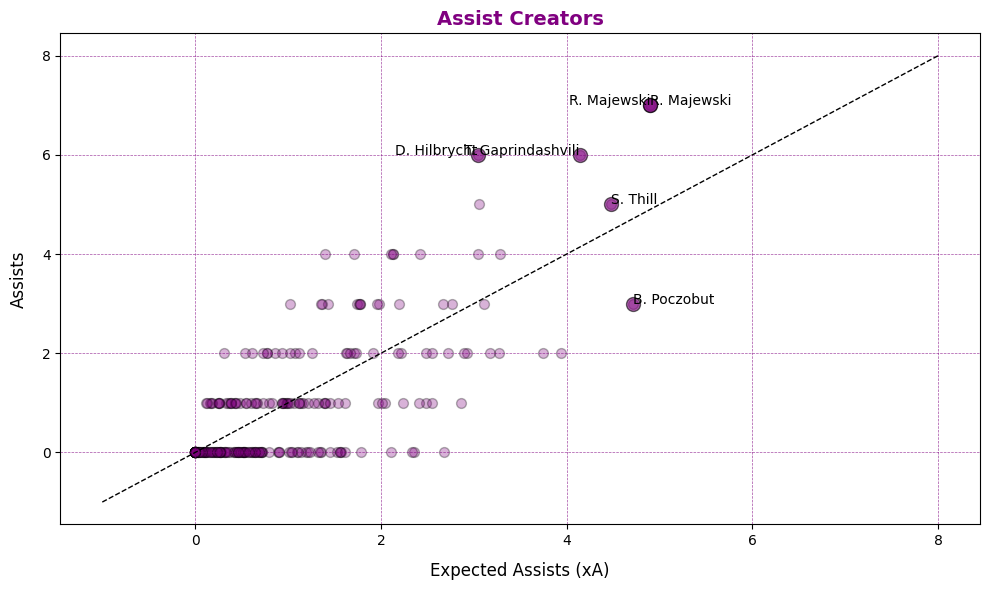

In [295]:
import matplotlib.pyplot as plt

def plot_assist_creators(df):
    """
    Plots a scatter plot of Expected Assists (xA) vs. Assists,
    highlighting the top 3 players in both categories, with a diagonal 
    line indicating over/underperformance.

    Parameters:
    df (DataFrame): DataFrame containing 'Assists', 'xA', 
                    'Minutes played', and 'Player' columns.
    """
    # Filter players with at least 700 minutes played
    df = df[df['Minutes played'] >= 700]

    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot for all players with alpha
    ax.scatter(df['xA'], df['Assists'], 
               color='purple', alpha=0.3, edgecolor='black', s=50, label="Players")

    # Highlight top 3 for Assists
    top_assists = df.nlargest(3, 'Assists')
    ax.scatter(top_assists['xA'], top_assists['Assists'], 
               color='purple', alpha=.6, edgecolor='black', s=100, label="Top Assists")

    # Highlight top 3 for xA
    top_xa = df.nlargest(3, 'xA')
    ax.scatter(top_xa['xA'], top_xa['Assists'], 
               color='purple', alpha=.6, edgecolor='black', s=100, label="Top xA")

    # Annotate top performers
    for _, row in top_assists.iterrows():
        ax.text(row['xA'], row['Assists'], 
                f"{row['Player']}", color='black', fontsize=10, ha='right')

    for _, row in top_xa.iterrows():
        ax.text(row['xA'], row['Assists'], 
                f"{row['Player']}", color='black', fontsize=10, ha='left')

    # Diagonal line for over/underperformance
    min_val = min(df['xA'].min(), df['Assists'].min()) - 1
    max_val = max(df['xA'].max(), df['Assists'].max()) + 1
    ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', linewidth=1)

    # Axis labels and title
    ax.set_xlabel('Expected Assists (xA)', fontsize=12, labelpad=10)
    ax.set_ylabel('Assists', fontsize=12, labelpad=10)
    ax.set_title('Assist Creators', fontsize=14, fontweight='bold', color='purple')

    # Add grid
    ax.grid(color='purple', linestyle='--', linewidth=0.5, alpha=0.7)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_assist_creators(df)


# Disruptors

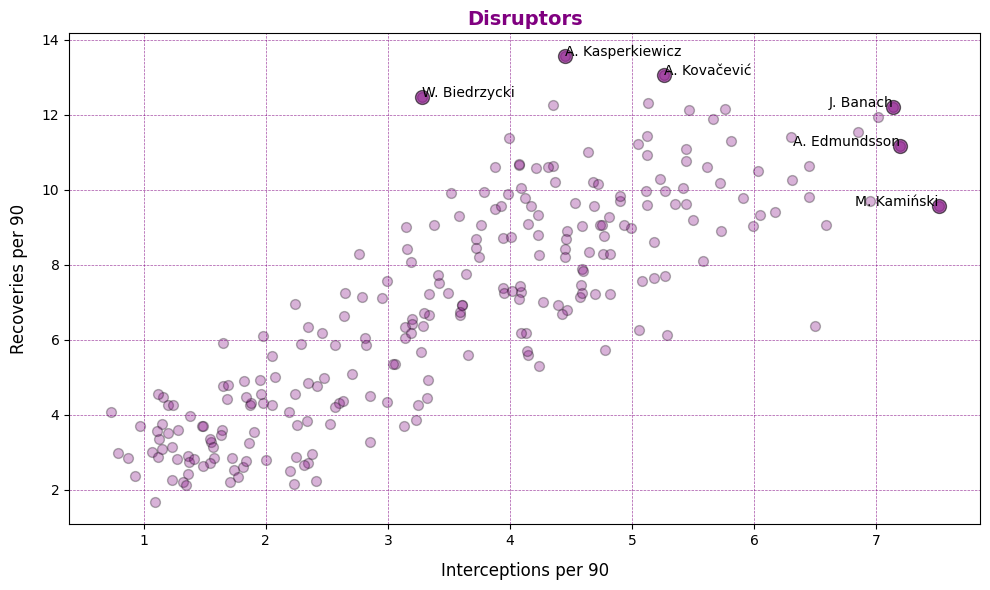

In [327]:
import matplotlib.pyplot as plt

def plot_disruptors(df):
    """
    Plots a scatter plot of Interceptions per 90 vs. Recoveries per 90,
    highlighting the top 7 players in both categories.

    Parameters:
    df (DataFrame): DataFrame containing 'Interceptions per 90', 'Recoveries per 90', 
                    'Minutes played', and 'player' columns.
    """
    # Filter players with at least 700 minutes played
    df = df[df['Minutes played'] >= 700]

    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot for all players with alpha
    ax.scatter(df['Interceptions per 90'], df['Recoveries per 90'], 
               color='purple', alpha=0.3, edgecolor='black', s=50, label="Players")

    # Highlight top 7 for interceptions
    top_interceptions = df.nlargest(3, 'Interceptions per 90')
    ax.scatter(top_interceptions['Interceptions per 90'], top_interceptions['Recoveries per 90'], 
               color='purple', alpha=.6, edgecolor='black', s=100, label="Top Interceptions")

    # Highlight top 7 for ball recoveries
    top_recoveries = df.nlargest(3, 'Recoveries per 90')
    ax.scatter(top_recoveries['Interceptions per 90'], top_recoveries['Recoveries per 90'], 
               color='purple', alpha=.6, edgecolor='black', s=100, label="Top Ball Recoveries")

    # Annotate top performers
    for _, row in top_interceptions.iterrows():
        ax.text(row['Interceptions per 90'], row['Recoveries per 90'], 
                f"{row['Player']}", color='black', fontsize=10, ha='right')

    for _, row in top_recoveries.iterrows():
        ax.text(row['Interceptions per 90'], row['Recoveries per 90'], 
                f"{row['Player']}", color='black', fontsize=10, ha='left')

    # Axis labels and title
    ax.set_xlabel('Interceptions per 90', fontsize=12, labelpad=10)
    ax.set_ylabel('Recoveries per 90', fontsize=12, labelpad=10)
    ax.set_title('Disruptors', fontsize=14, fontweight='bold', color='purple')

    # Add grid
    ax.grid(color='purple', linestyle='--', linewidth=0.5, alpha=0.7)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_disruptors(df)

# Goalscorers

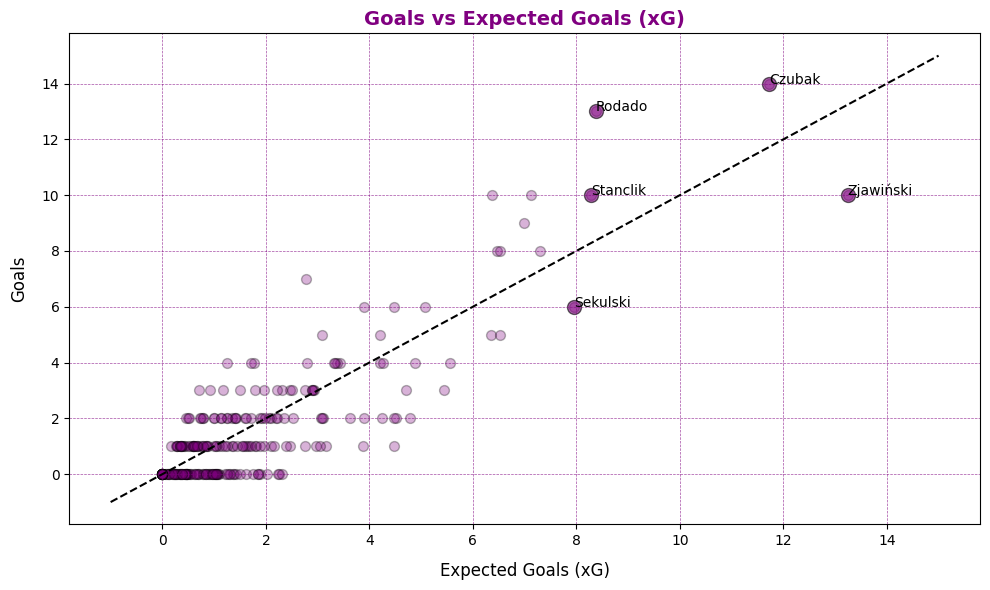

In [333]:
import matplotlib.pyplot as plt

def plot_xg_vs_goals(df):
    """
    Plots a scatter plot of Expected Goals (xG) vs. Goals,
    highlighting the top 5 players for xG, with a diagonal 
    line indicating over/underperformance.

    Parameters:
    df (DataFrame): DataFrame containing 'Goals', 'xG', 
                    'Minutes played', and 'Player' columns.
    """
    # Filter players with at least 700 minutes played
    df = df[df['Minutes played'] >= 700]

    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot for all players with alpha
    ax.scatter(df['xG'], df['Goals'], 
               color='purple', alpha=0.3, edgecolor='black', s=50, label="Players")

    # Highlight top 5 players for xG
    top_5_xg = df.nlargest(5, 'xG')
    ax.scatter(top_5_xg['xG'], top_5_xg['Goals'], 
               color='purple', alpha=.6, edgecolor='black', s=100, label="Top xG")

    # Annotate using last names
    for _, row in top_5_xg.iterrows():
        last_name = row['Player'].split()[-1]  # Get the last part of the name (last name)
        ax.text(row['xG'], row['Goals'], 
                f"{last_name}", color='black', fontsize=10, ha='left')

    # Axis labels and title
    ax.set_xlabel('Expected Goals (xG)', fontsize=12, labelpad=10)
    ax.set_ylabel('Goals', fontsize=12, labelpad=10)
    ax.set_title('Goals vs Expected Goals (xG)', fontsize=14, fontweight='bold', color='purple')

    # Add a diagonal line for over/underperformance
    min_val = min(df['xG'].min(), df['Goals'].min()) - 1
    max_val = max(df['xG'].max(), df['Goals'].max()) + 1
    ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--')

    # Add grid
    ax.grid(color='purple', linestyle='--', linewidth=0.5, alpha=0.7)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function
plot_xg_vs_goals(df)


# Duel Dominators

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_60577/4154797232.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined_score'] = df['Defensive duels won, %'] + df['Aerial duels won, %']


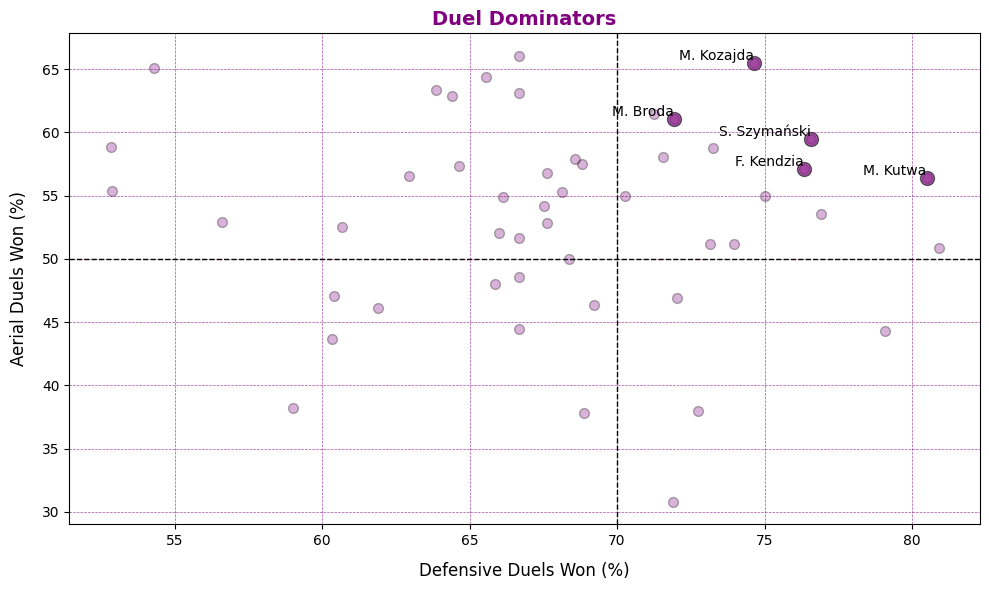

In [321]:
import matplotlib.pyplot as plt

def plot_aerial_duels(df):
    """
    Plots a scatter plot of Aerial Duels per 90 vs. Aerial Duels Won %,
    highlighting the top 5 players with the best combination of both metrics,
    with a reference line at 50% aerial duel win rate and a vertical line at 70% 
    for Defensive Duels Won %.

    Parameters:
    df (DataFrame): DataFrame containing 'Aerial duels per 90', 'Aerial duels won, %',
                    'Minutes played', 'Player', 'Position', and 'Age' columns.
    """
    # Filter players with at least 700 minutes played and specific positions
    df = df[
        (df['Minutes played'] >= 700) &
        (df['Position'].str.contains('CB')) &
        (df['Age'] <= 30)
    ]

    # Calculate a combined score (you can adjust the weights if needed)
    df['combined_score'] = df['Defensive duels won, %'] + df['Aerial duels won, %']

    # Get the top 5 players based on the combined score
    top_combined = df.nlargest(5, 'combined_score')

    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot for all players
    ax.scatter(df['Defensive duels won, %'], df['Aerial duels won, %'], 
               color='purple', alpha=0.3, edgecolor='black', s=50, label="Players")

    # Highlight top 5 players based on combined score
    ax.scatter(top_combined['Defensive duels won, %'], top_combined['Aerial duels won, %'], 
               color='purple', alpha=0.6, edgecolor='black', s=100, label="Top 5 Combined")

    # Annotate top 5 performers
    for _, row in top_combined.iterrows():
        ax.text(row['Defensive duels won, %'], row['Aerial duels won, %'], 
                f"{row['Player']}", color='black', fontsize=10, ha='right', verticalalignment='bottom')

    # Reference line at 50% win rate for aerial duels
    ax.axhline(y=50, color='black', linestyle='--', linewidth=1, label='50% Win Rate')

    # Vertical line at 70% for Defensive Duels Won %
    ax.axvline(x=70, color='black', linestyle='--', linewidth=1, label='70% Defensive Duels')

    # Axis labels and title
    ax.set_xlabel('Defensive Duels Won (%)', fontsize=12, labelpad=10)
    ax.set_ylabel('Aerial Duels Won (%)', fontsize=12, labelpad=10)
    ax.set_title('Duel Dominators', fontsize=14, fontweight='bold', color='purple')

    # Add grid
    ax.grid(color='purple', linestyle='--', linewidth=0.5, alpha=0.7)

    # Display legend
    #ax.legend()

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function
plot_aerial_duels(df)


# Dribblers

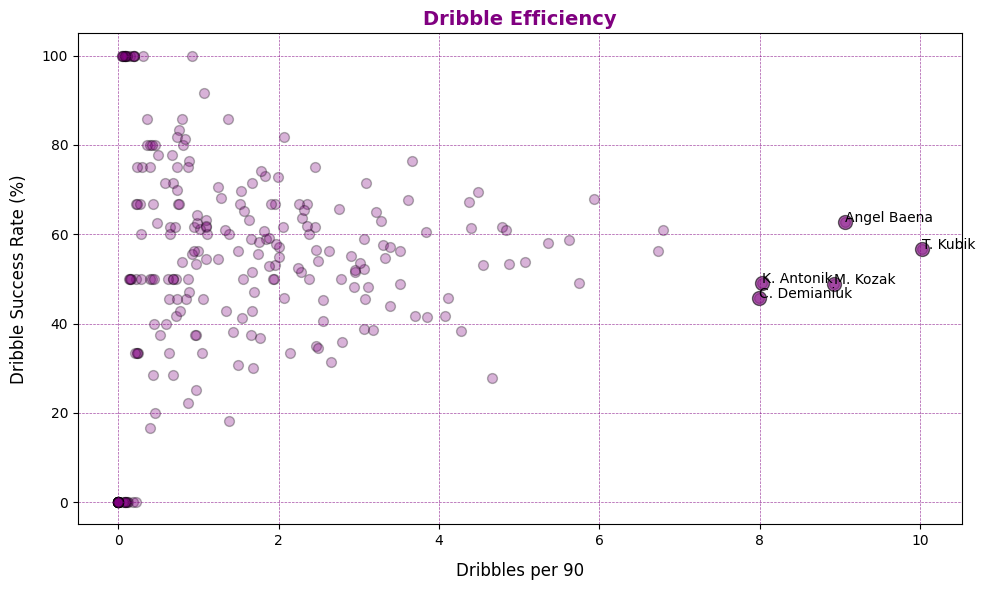

In [352]:
import matplotlib.pyplot as plt

def plot_dribble_efficiency(df):
    """
    Plots a scatter plot of Dribbles per 90 vs. Dribble Success Rate (%),
    highlighting the top 5 dribblers based on Dribbles per 90.

    Parameters:
    df (DataFrame): DataFrame containing 'Dribbles per 90', 'Successful dribbles, %', 
                    'Minutes played', 'Position', and 'Player' columns.
    """
    # Filter players with at least 700 minutes played and Position as 'LW' or 'RW'
    df = df[(df['Minutes played'] >= 700)] #& (df['Position'].isin(['LW', 'RW']))]

    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot for all players with alpha
    ax.scatter(df['Dribbles per 90'], df['Successful dribbles, %'], 
               color='purple', alpha=0.3, edgecolor='black', s=50, label="Players")

    # Select top 5 players based on Dribbles per 90
    top_5_dribblers = df.nlargest(5, 'Dribbles per 90')

    # Highlight the top 5 players with stronger color and higher alpha
    ax.scatter(top_5_dribblers['Dribbles per 90'], top_5_dribblers['Successful dribbles, %'], 
               color='purple', alpha=0.6, edgecolor='black', s=100, label="Top 5 Dribblers")

    # Annotate top 5 players
    for _, row in top_5_dribblers.iterrows():
        # Split player name and get the last two parts
        player_name_parts = row['Player'].split()
        display_name = " ".join(player_name_parts[-2:])  # Get the last two names
        ax.text(row['Dribbles per 90'], row['Successful dribbles, %'], 
                display_name, color='black', fontsize=10, ha='left')

    # Customize the grid
    ax.grid(color='purple', linestyle='--', linewidth=0.5, alpha=0.7)

    # Add axis labels and title
    ax.set_xlabel('Dribbles per 90', fontsize=12, labelpad=10)
    ax.set_ylabel('Dribble Success Rate (%)', fontsize=12, labelpad=10)
    ax.set_title('Dribble Efficiency', fontsize=14, fontweight='bold', color='purple')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

plot_dribble_efficiency(df)


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Define filter function for each position
def filter_position(df, metrics, weights, height=0, min_minutes=700, max_age=30, position='RB'):
    """
    Filter players based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Define a list of positions with their respective metrics and weights
positions_info = [
    {
        'position': 'GK',
        'metrics': ['Prevented goals per 90', "Save rate, %", "Passes to final third per 90",
                    "Accurate long passes, %", 'Exits per 90', 'Shots against per 90', 'xG against', "xG against per 90"],
        'weights': [5, 4, 4, 3, 3, 2, 2, 1]
    },
    {
        'position': 'RB',
        'metrics': ['Progressive runs per 90', "Accurate crosses, %", 'Forward passes per 90', 'Defensive duels won, %',
                    "Accelerations per 90", 'Dribbles per 90', "Successful defensive actions per 90", "Accurate short / medium passes, %"],
        'weights': [5, 1, 5, 2, 3, 3, 2, 1]
    },
    # Add more positions with their metrics and weights as needed
]

# Create an Excel writer
with pd.ExcelWriter('top_players_by_position.xlsx') as writer:

    for position_info in positions_info:
        position = position_info['position']
        metrics = position_info['metrics']
        weights = position_info['weights']
        
        # Filter for each position
        df_position = filter_position(df, metrics, weights, position=position)

        # Sort by Normalized Score and get top 3
        df_sorted = df_position[["Player", "Age", "Team", "Minutes played", 'Contract expires', "Z-Score", "Normalized Score (0-100)", 
                                 'Progressive runs per 90', "Accurate crosses, %", 'Forward passes per 90', 'Defensive duels won, %',
                                 "Accelerations per 90", 'Dribbles per 90", "Successful defensive actions per 90",
                                 "Accurate short / medium passes, %"]].sort_values(by="Normalized Score (0-100)", ascending=False)

        # Select top 3 players
        top_3_players = df_sorted.head(3)

        # Write to Excel with the position name as the sheet title
        top_3_players.to_excel(writer, sheet_name=position, index=False)

print("Excel file 'top_players_by_position.xlsx' has been created.")


In [356]:
df_sorted.head()

,Player,Age,Team,Minutes played,Contract expires,Z-Score,Normalized Score (0-100),Prevented goals per 90,"Save rate, %",Passes to final third per 90,"Accurate long passes, %",Exits per 90,Shots against per 90,xG against,xG against per 90
144,M. Kuchta,28.0,Polonia Warszawa,1550,2025-06-30,1.500619,93.33,0.127,76.92,1.39,77.78,2.09,3.77,17.18,1.00
406,A. Wilk,27.0,Stal Stalowa Wola,1455,2025-06-30,1.166179,87.82,-0.043,73.00,2.47,69.61,2.04,6.19,26.30,1.63
439,A. Bobek,20.0,Łódzki KS,1148,2025-06-30,1.005820,84.27,0.261,80.88,1.72,65.15,1.72,5.33,16.33,1.28
255,J. Wrąbel,28.0,Miedź Legnica,1853,2026-06-30,0.616487,73.12,0.201,77.78,0.68,62.63,1.89,3.93,22.13,1.07
244,K. Bąkowski,21.0,Stal Rzeszów,1646,2026-06-30,0.613437,73.02,-0.005,71.43,0.93,71.57,1.31,4.21,21.90,1.20
